In [ ]:
# Book recommender

# Explore dataset

In [1]:
import pandas as pd

In [2]:
users_csv_path = './Users.csv'
ratings_csv_path = './Ratings.csv'
users_df = pd.read_csv(users_csv_path)
ratings_df = pd.read_csv(ratings_csv_path)
books_df = pd.read_csv('./Books.csv')

/tmp/ipykernel_3881/17673897.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('./Books.csv')


<Axes: ylabel='Frequency'>

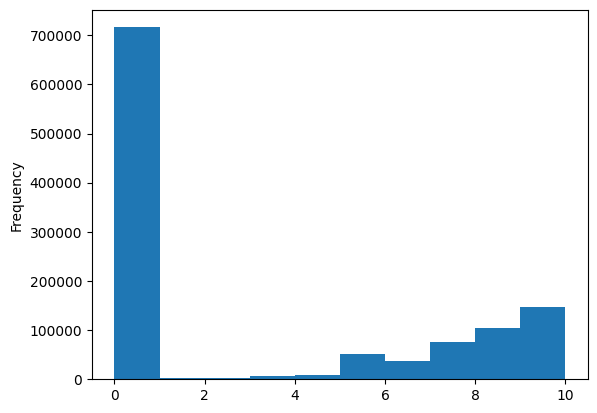

In [14]:
ratings_df['Book-Rating'].plot(kind='hist')

In [42]:
ratings_df[ratings_df['User-ID'] == 11676]

,User-ID,ISBN,Book-Rating
45326,11676,9022906116,7
45327,11676,"\0432534220\""""",6
45328,11676,"\2842053052\""""",7
45329,11676,0 7336 1053 6,0
45330,11676,0=965044153,7
...,...,...,...
58923,11676,O77O428452,0
58924,11676,O805063196,0
58925,11676,O9088446X,8
58926,11676,X000000000,10


In [18]:
# visualize how many books per author
books_df.groupby('Book-Author').mean().plot()

TypeError: agg function failed [how->mean,dtype->object]

In [4]:
books_df.memory_usage()

Index                      132
ISBN                   2170880
Book-Title             2170880
Book-Author            2170880
Year-Of-Publication    2170880
Publisher              2170880
Image-URL-S            2170880
Image-URL-M            2170880
Image-URL-L            2170880
dtype: int64

In [5]:
books_df['Book-Author'] = books_df['Book-Author'].astype(str)

In [6]:
books_df.memory_usage()

Index                      132
ISBN                   2170880
Book-Title             2170880
Book-Author            2170880
Year-Of-Publication    2170880
Publisher              2170880
Image-URL-S            2170880
Image-URL-M            2170880
Image-URL-L            2170880
dtype: int64

In [103]:
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype('category')
books_df['Publisher'] = books_df['Publisher'].astype('category')

In [104]:
books_df.memory_usage()

Index                      132
ISBN                   2170880
Book-Title             2170880
Book-Author            2170880
Year-Of-Publication     552632
Publisher              1205600
Image-URL-S            2170880
Image-URL-M            2170880
Image-URL-L            2170880
transformed_ISBN        271360
dtype: int64

In [ ]:
books_df[books_df['Book-Author'] == 'Plato']

In [ ]:
books_df[books_df['ISBN'] == '3257207522']

In [ ]:
books_df['Publisher'].unique()

In [ ]:
users_df.head(), ratings_df.head()

In [ ]:
ratings_df['User-ID'].unique()

In [ ]:
users_df['User-ID'].unique()

In [ ]:
ratings_by_user = ratings_df.groupby('User-ID')

In [ ]:
ratings_by_user.groups[276729]

In [98]:
# visualize book titles

def get_books_from_ids(ids, books_df):
    return books_df[books_df['ISBN'].isin(ids)][['Book-Title', 'Book-Author']]

In [99]:
get_books_from_ids(['55305663'], books_df)

,Book-Title,Book-Author


# Data quality

User and ratings datasets are okay, there's not much to improve.
With books dataset, theres one big issue and that are reprints. Basically the same book is split into many instances under many different ISBN
(hello equivalence classes).
To improve data quality, we need to assign new ids, that will correspond to class of one book."

## we should also clear dataset of corrupted isbn


ISBN consists of digits only, with exception of X which stands for 10 (Roman numerals right).
Lets do a simple check of ISBN validity and preceed it with regular expression to filter corrupted ones.

In [84]:
import re
def check_dataset_ISBN(books_df):
    # first transform isbn into correct format 
    books_df['transformed_ISBN'] = books_df['ISBN'].apply(transform_ISBN)
    books_df['transformed_ISBN'] = books_df['transformed_ISBN'].apply(check_if_ISBN_is_valid)
    return books_df

In [95]:
new_books = check_dataset_ISBN(ratings_df)

In [96]:
new_books[new_books['transformed_ISBN'] == False]

,User-ID,ISBN,Book-Rating,transformed_ISBN
40,276762,342662429,0,False
54,276762,B0000BLD7X,0,False
55,276762,N3453124715,4,False
143,276822,0699854289,10,False
172,276842,3809407536,7,False
...,...,...,...,...
1149358,276670,00969754916,7,False
1149399,276670,0676971395,8,False
1149428,276670,15655122046,6,False
1149439,276670,55305663,6,False


In [91]:
def transform_ISBN(isbn):
    pattern = "[xX0-9-]+"
    match = re.fullmatch(pattern, isbn)
    if match:
        return match.group(0)

In [92]:
def check_if_ISBN_is_valid(ISBN):
    if ISBN is None:
        return False
    total_weighted_sum = 0
    i = 10
    for num in ISBN:
        if num == 'X' or num == 'x':
            num = 10
        elif num == '-':
            continue
        total_weighted_sum += i * int(num)
        i -= 1
    return total_weighted_sum % 11 == 0
        
    

In [75]:
check_if_ISBN_is_valid('432534220')

False

In [76]:
pattern = "[X0-9-]+"
print(re.match(pattern, '9022906116'))
re.fullmatch(pattern, 'X000000000')
print(re.fullmatch(pattern, '\0432534220\""'))

<re.Match object; span=(0, 10), match='9022906116'>
None


In [101]:
books_df[books_df['ISBN'] == '15655122046']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,transformed_ISBN


In [ ]:
gp = books_df.groupby('Book-Author')

In [ ]:
from collections import Counter

In [ ]:
total_duplicates = 0
for name, group in gp:
    print(name)
    # print(40*'-')
    counter = Counter(group['Book-Title'])
    duplicates = [name for name, value in counter.items() if value > 1]
    print(duplicates)
    total_duplicates += len(duplicates)
print(f"Found total {total_duplicates} duplicates")

In [ ]:
sorted_books[sorted_books['Book-Title'] == 'The Dragon and the Unicorn']

In [ ]:
sorted_books['new_id']

In [ ]:
total_duplicates = 0
for name, group in gp:
    # print(name)
    # print(40*'-')
    counter = group['Book-Title'].value_counts()
    # print(counter)
    duplicates = counter[counter > 1]
    # duplicates = [name for name, value in counter.items() if value > 1]
    # if not duplicates.empty:
    #     print(duplicates)
    total_duplicates += len(duplicates)
print(f"Found total {total_duplicates} duplicates")

In [102]:
def add_new_index_to_books(books_df):
    sorted_books = books_df.sort_values(by=['Book-Author', 'Book-Title'])
    new_ids = []
    current_id = 0
    prev_title = None
    prev_author = None
    for index, row in sorted_books.iterrows():
        if prev_author is None or prev_title is None:
            prev_author = row['Book-Author']
            prev_title = row['Book-Title']
            new_ids.append(current_id)
            continue
    
        if row['Book-Author'] == prev_author:
            # same author
            if row['Book-Title'] != prev_title:
                current_id += 1
                # new_ids.append(current_id)
        else:
            current_id += 1
        new_ids.append(current_id)
        prev_author = row['Book-Author']
        prev_title = row['Book-Title']
    sorted_books['new-id'] = new_ids
    new_books_df = sorted_books.sort_index()#.to_csv('trans_books.csv')
    return new_books_df

In [ ]:
books_df

In [ ]:
isbn = books_df['ISBN'].sample().values[0]

In [ ]:
ratings_by_books = implicit_ratings.groupby("ISBN")

In [ ]:
ratings_by_books.groups[isbn]

In [ ]:
implicit_ratings[implicit_ratings['ISBN']== isbn]['User-ID'] .values

In [ ]:
sorted_books['new-id'] = new_ids

In [ ]:
sorted_books.sort_index().to_csv('trans_books.csv')

In [ ]:
# now when books have new id we need to take ratings and assign them new rating too
# then we can make predictions opon these new ids

In [ ]:
pd.merge(ratings_df, sorted_books[['ISBN', 'new-id']], on='ISBN').to_csv('trans_ratings.csv')

In [ ]:
# now assign new ids to be used which will be shared for books of same name from same author

In [ ]:
books_df['Book-Title'].count() - len()

In [ ]:
books_df['Book-Title'].count() - len(books_df['Book-Title'].unique())

# Simple implicit neighbourhood similarity

In [ ]:
# get implicit ratings

In [ ]:
implicit_ratings = ratings_df[ratings_df['Book-Rating'] == 0]

In [ ]:
implicit_ratings.columns

In [ ]:
books_df[books_df['ISBN'] == '3442437407']

In [ ]:
implicit_ratings = implicit_ratings.astype({'ISBN': 'str'})

In [ ]:
implicit_ratings_by_user = implicit_ratings.groupby('User-ID')

In [ ]:
implicit_ratings['book_id'] = implicit_ratings['ISBN'].apply(isbn_to_id)

In [ ]:
implicit_ratings.shape

In [ ]:
def isbn_to_id(ISBN):
    titles = books_df[books_df['ISBN'] == ISBN]
    if titles.empty:
        return None
    return titles.index[0]


In [ ]:
from collections import defaultdict

def create_neighbourhood_dict(ratings_by_user, max_groups=1000):
    """Calculate and return dict of books with neighbourhoods.
        Neighbourhood itself is also dict with books in neighbourhood and values representing similarity (greater the better)
    """
    neighbourhoods = defaultdict(dict)
    j = 0
    for user, group in ratings_by_user:
        # print(user, group)
        if j > max_groups:
            break
        j += 1
        group_len = len(group)
        if group_len >=2:
            # add to hoods
            group_isbn = group['ISBN']
            for i, ISBN in enumerate(group_isbn):
                # print(i, values)
                main_isbn = ISBN
                
                for index, index_isbn in enumerate(group_isbn):
                    if i == index:
                        continue
                    if index_isbn in neighbourhoods[main_isbn]:
                        neighbourhoods[main_isbn][index_isbn] += 1
                    else:
                        neighbourhoods[main_isbn][index_isbn] = 1
                    # print(neighbourhoods)
    return neighbourhoods


In [ ]:
# neighbourhoods = create_neighbourhood_dict(implicit_ratings_by_user, max_groups=100_000)

In [ ]:
import cProfile
import re
cProfile.run('create_neighbourhood_dict(implicit_ratings_by_user, max_groups=50_000)')

In [ ]:
# ok since calculating similarity measure between items is difficult
# lets try it the other way around
# when we should find a recommendation for a book
# we get all users that read that book
# aggregate their favourite books and rank by count
# neighbourhood based on people

In [ ]:
def get_user_ids_for_ISBN(ratings_df, ISBN):
    return ratings_df[ratings_df['ISBN'] == ISBN]['User-ID']

In [ ]:
def get_books_for_users(ratings_df, user_ids):
    return ratings_df[ratings_df['User-ID'].isin(user_ids)]

In [ ]:
get_user_ids_for_ISBN(implicit_ratings, '1561711543')

In [ ]:
get_books_for_user(ratings_df, 276733)

In [ ]:
def get_user_books(books_df, implicit_ratings, users_df):
    neighbourhood = {}
    for index, user in users_df['User-ID'].items():
        books = get_books_for_users(implicit_ratings, users)['ISBN']
        neighbourhood[index] = books.values
    return neighbourhood
    
        

In [ ]:
def find_book_in_dataset(book_string, books_df):
    books_with_lower = books_df['Book-Title'].str.lower()
    book_string = book_string.lower().split(" ")
    bool_indices = books_with_lower.str.contains(book_string[0])
    for word in book_string:
        bool_indices = bool_indices & books_with_lower.str.contains(word)
    return books_df[bool_indices].iloc[0]
    

In [ ]:
a = find_book_in_dataset("book", books_df)

In [ ]:
a

In [ ]:
hoods = get_user_books(books_df, implicit_ratings, users_df)

In [ ]:
len(hoods)

In [ ]:
from collections import Counter


def get_hoods_for_book(book_isbn, hoods):
    all_similar_books = []
    for user_id, hood in hoods.items():
        # print(hood)
        if book_isbn in hood:
            all_similar_books.extend(hood)
    return Counter(all_similar_books)

In [ ]:
get_hoods_for_book('0380780879', hoods)

In [ ]:
implicit_ratings.head()

In [ ]:

# now if we want similar, get users for book


In [ ]:
Counter(implicit_ratings[implicit_ratings['User-ID'].isin(user_ids)]['ISBN'].values)

In [ ]:
ratings_by_books = implicit_ratings.groupby("ISBN")

def recommend_books_for_book(book_ISBN, top_n=5):
    indices = ratings_by_books.groups[book_ISBN]
    user_ids = implicit_ratings.loc[indices, 'User-ID'].values
    return Counter(implicit_ratings[implicit_ratings['User-ID'].isin(user_ids)]['ISBN'].values).most_common(top_n)

In [ ]:

recommend_books_for_book('0971880107')

In [ ]:
get_books_from_ids(['0971880107', '0316666343'], books_df)

In [ ]:
cProfile.run('get_hoods(books_df, implicit_ratings, max_iter=100)')

# Explicit ratings

In [ ]:
ratings_df[ratings_df['Book-Rating'] != 0]

In [ ]:
ratings_df[ratings_df['Book-Rating'] == 0]

there's enough explicit ratings to be important
merge implicit and explicit ratings

In [ ]:
import json


In [ ]:
json.loads({})

# Generalized matrix factorization

In [ ]:
import torch
import torch.nn as nn

In [105]:
class GMF(nn.Module):

    def __init__(self):
        super().__init__()
        # consists of basically two lookup tables
        # as matrix factorization is a factorization into two parts
        # user - preferences

NameError: name 'nn' is not defined

In [106]:
# for this approach we would need to authenticate our users and store their profiles
# not suitable for item based approach